In [1]:
import re
import numpy as np
import collections
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



In [2]:
df = pd.read_csv(r"D:\data science\Project\Personality prediction _MBIT\mbti_1.csv")
print(df.head(10))
print("*"*40)
print(df.info())

   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...
6  INFJ  'No, I can't draw on my own nails (haha). Thos...
7  INTJ  'I tend to build up a collection of things on ...
8  INFJ  I'm not sure, that's a good question. The dist...
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB
None


In [3]:
df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
print(df.head())

   type                                              posts  words_per_comment
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...              11.12
1  ENTP  'I'm finding the lack of me in these posts ver...              23.40
2  INTP  'Good one  _____   https://www.youtube.com/wat...              16.72
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...              21.28
4  ENTJ  'You're fired.|||That's another silly misconce...              19.34


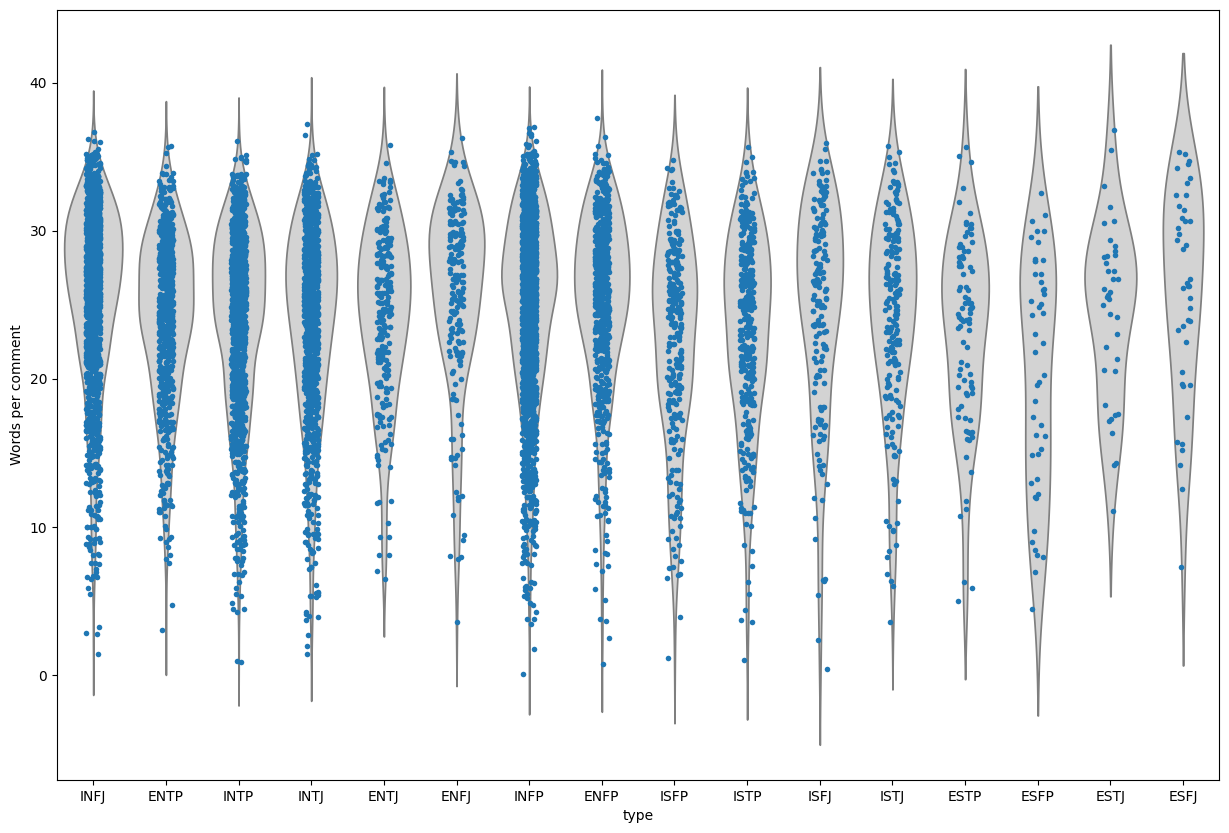

In [4]:
plt.figure(figsize=(15,10))
sns.violinplot(x='type', y='words_per_comment', data=df, inner=None, color='lightgray')
sns.stripplot(x='type', y='words_per_comment', data=df, size=4, jitter=True)
plt.ylabel('Words per comment')
plt.show()

<Figure size 1500x1000 with 0 Axes>

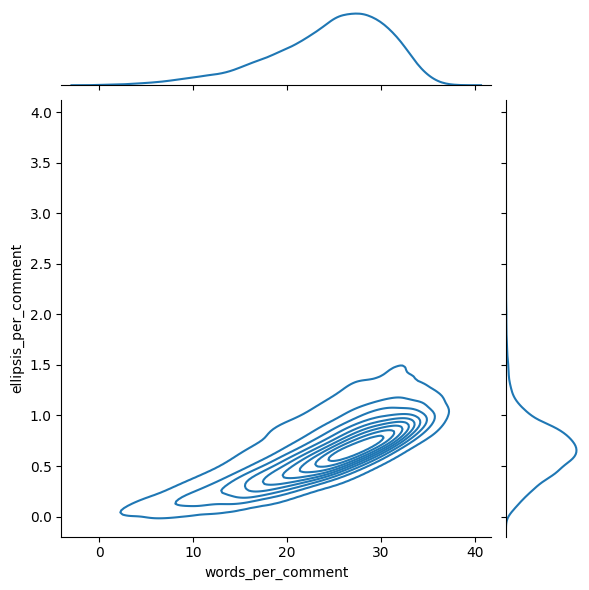

In [5]:
df['http_per_comment'] = df['posts'].apply(lambda x: x.count('http')/50)
df['music_per_comment'] = df['posts'].apply(lambda x: x.count('music')/50)
df['question_per_comment'] = df['posts'].apply(lambda x: x.count('?')/50)
df['img_per_comment'] = df['posts'].apply(lambda x: x.count('jpg')/50)
df['excl_per_comment'] = df['posts'].apply(lambda x: x.count('!')/50)
df['ellipsis_per_comment'] = df['posts'].apply(lambda x: x.count('...')/50)

plt.figure(figsize=(15,10))
sns.jointplot(x='words_per_comment', y='ellipsis_per_comment', data=df, kind='kde')

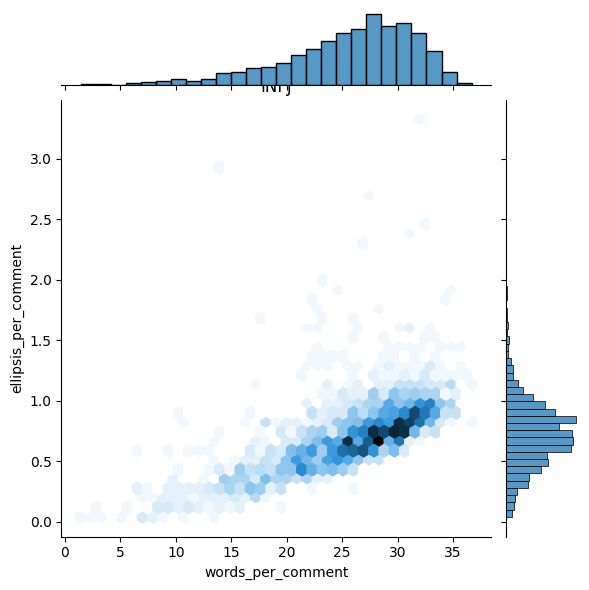

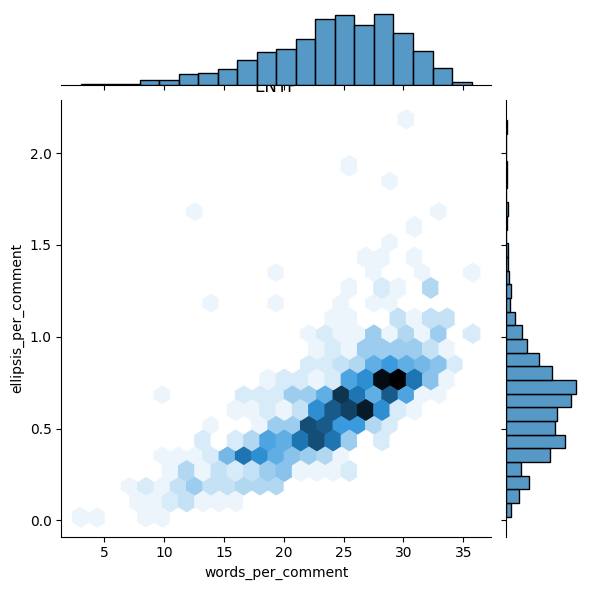

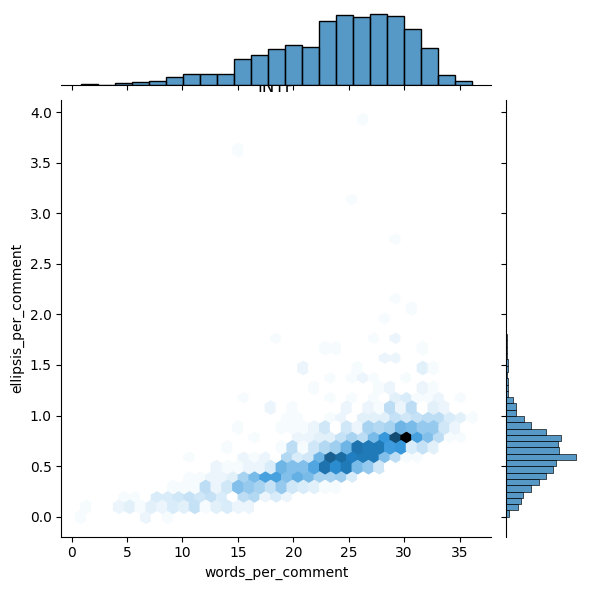

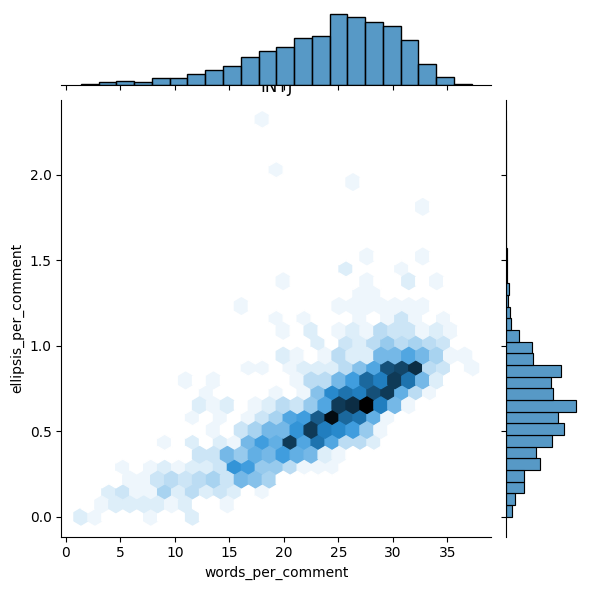

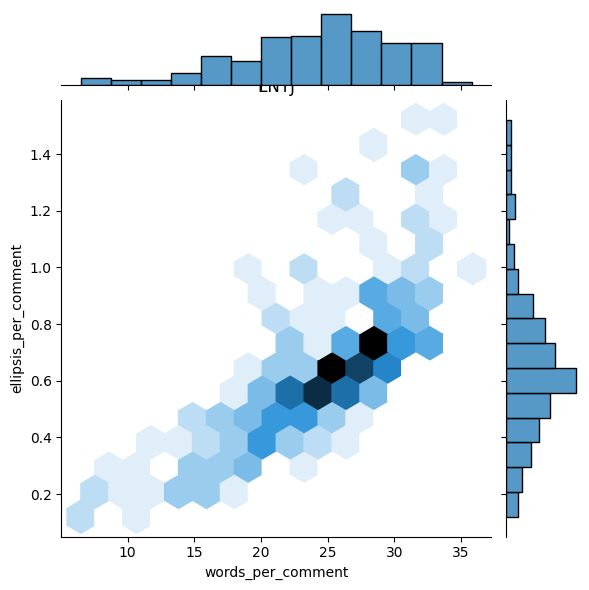

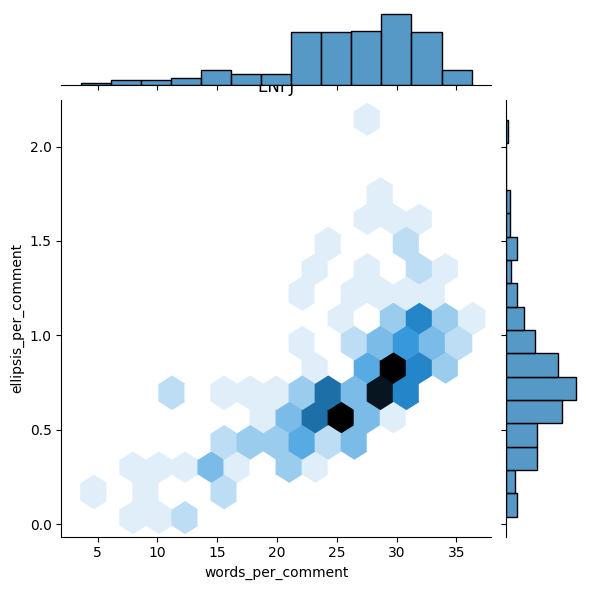

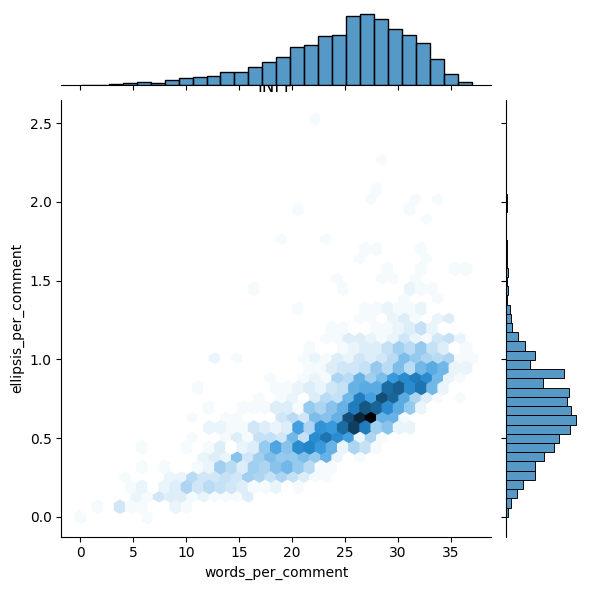

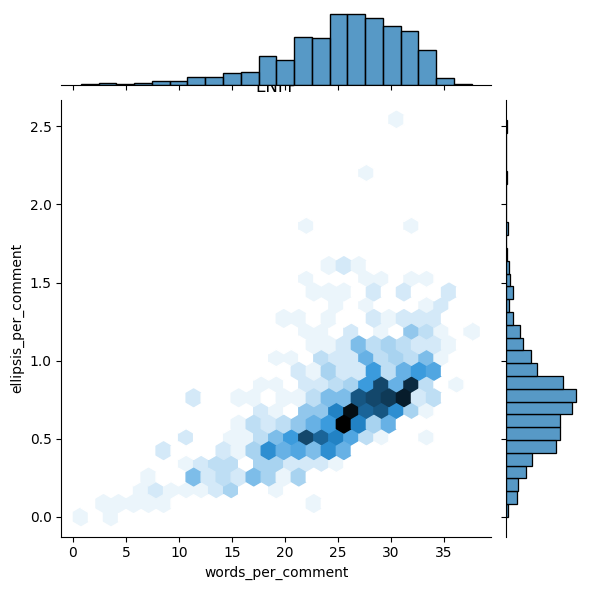

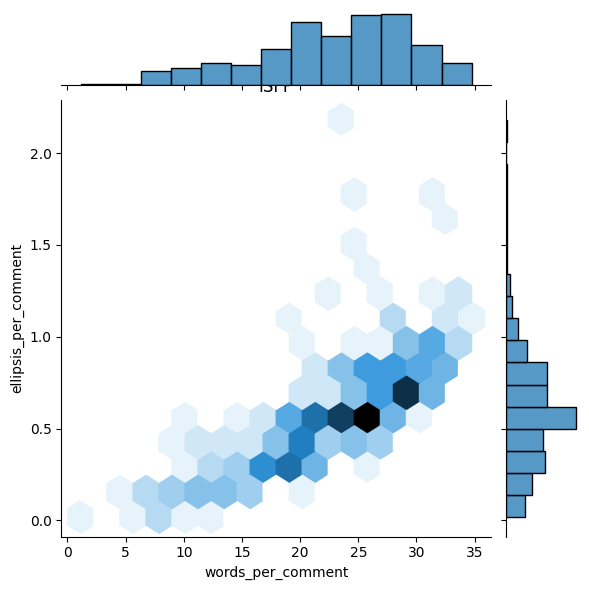

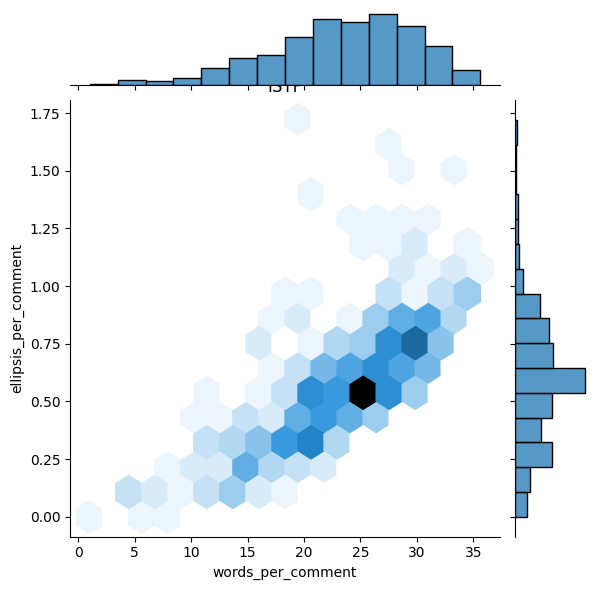

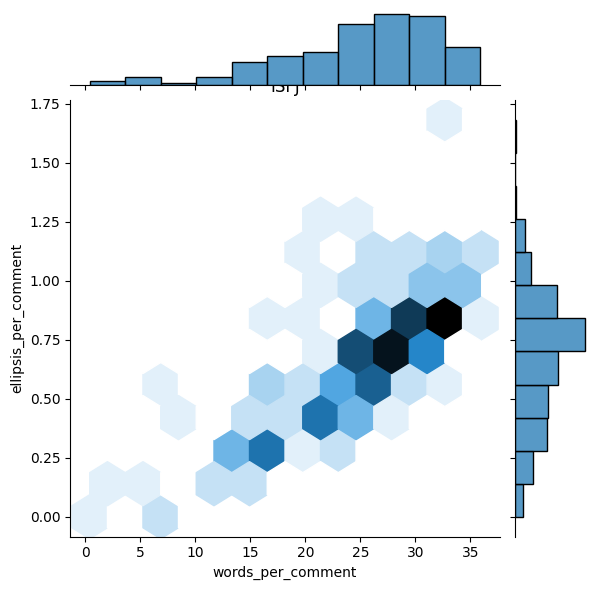

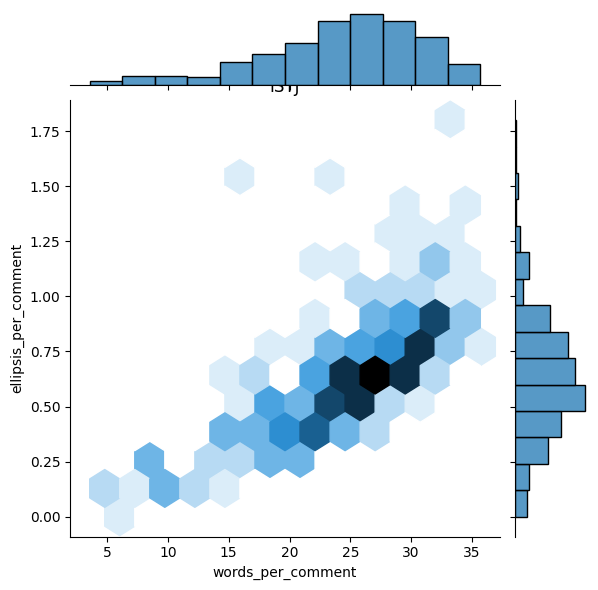

In [6]:
i = df['type'].unique()
k = 0
for m in range(0,2):
    for n in range(0,6):
        df_2 = df[df['type'] == i[k]]
        sns.jointplot(x='words_per_comment', y='ellipsis_per_comment', data=df_2, kind="hex")
        plt.title(i[k])
        k+=1

0.6399820319539542
0.7054114704760909
0.6417417099995271
0.7418360967765789
0.7423804864273494
0.6701370930896873
0.7223598412495944
0.6421043831098797
0.7239129106930459
0.7305845421989157
0.7604230880988553
0.6974642499076582
[np.float64(0.7604230880988553), np.float64(0.7423804864273494), np.float64(0.7418360967765789), np.float64(0.7305845421989157), np.float64(0.7239129106930459), np.float64(0.7223598412495944), np.float64(0.7054114704760909), np.float64(0.6974642499076582), np.float64(0.6701370930896873), np.float64(0.6421043831098797), np.float64(0.6417417099995271), np.float64(0.6399820319539542)]
['INFJ', 'INTP', 'ENFP', 'ENFJ', 'ISTJ', 'ENTP', 'INFP', 'ISFP', 'ISTP', 'INTJ', 'ENTJ', 'ISFJ']


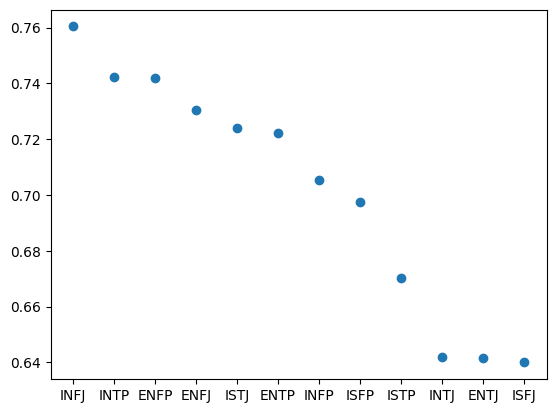

In [7]:
i = df['type'].unique()
k = 0
TypeArray = []
PearArray=[]
for m in range(0,2):
    for n in range(0,6):
        df_2 = df[df['type'] == i[k]]
        pearsoncoef1=np.corrcoef(x=df_2['words_per_comment'], y=df_2['ellipsis_per_comment'])
        pear=pearsoncoef1[1][0]
        print(pear)
        TypeArray.append(i[k])
        PearArray.append(pear)
        k+=1


TypeArray = [x for _,x in sorted(zip(PearArray,TypeArray))]
PearArray = sorted(PearArray, reverse=True)
print(PearArray)
print(TypeArray)
plt.scatter(TypeArray, PearArray)

In [8]:
map1 = {"I": 0, "E": 1}
map2 = {"N": 0, "S": 1}
map3 = {"T": 0, "F": 1}
map4 = {"J": 0, "P": 1}
df['I-E'] = df['type'].astype(str).str[0]
df['I-E'] = df['I-E'].map(map1)
df['N-S'] = df['type'].astype(str).str[1]
df['N-S'] = df['N-S'].map(map2)
df['T-F'] = df['type'].astype(str).str[2]
df['T-F'] = df['T-F'].map(map3)
df['J-P'] = df['type'].astype(str).str[3]
df['J-P'] = df['J-P'].map(map4)
print(df.head(10))

   type                                              posts  words_per_comment  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...              11.12   
1  ENTP  'I'm finding the lack of me in these posts ver...              23.40   
2  INTP  'Good one  _____   https://www.youtube.com/wat...              16.72   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...              21.28   
4  ENTJ  'You're fired.|||That's another silly misconce...              19.34   
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...              29.82   
6  INFJ  'No, I can't draw on my own nails (haha). Thos...              26.58   
7  INTJ  'I tend to build up a collection of things on ...              24.46   
8  INFJ  I'm not sure, that's a good question. The dist...              14.76   
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...              24.66   

   http_per_comment  music_per_comment  question_per_comment  img_per_comment  \
0              0.48        

In [9]:
X = df.drop(['type','posts','I-E','N-S','T-F','J-P'], axis=1).values
y = df['type'].values

print(y.shape)
print(X.shape)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.1, random_state=5)

sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
sgd.score(X_train, y_train)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
print(round(acc_sgd,2,), "%")

(8675,)
(8675, 7)
21.07 %


In [10]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

100.0 %


In [11]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(round(acc_log,2,), "%")

23.25 %


C:\Users\GAURI DUBEY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(round(acc_knn,2,), "%")

46.62 %


In [13]:
XX = df.drop(['type','posts','I-E'], axis=1).values
yy = df['I-E'].values

print("outcome shape",yy.shape)
print("input shape for machine learning data",XX.shape)

XX_train,XX_test,yy_train,yy_test=train_test_split(XX,yy,test_size = 0.1, random_state=5)

sgdd = SGDClassifier(max_iter=5, tol=None)
sgdd.fit(XX_train, yy_train)
Y_predd = sgdd.predict(XX_test)
sgdd.score(XX_train, yy_train)
acc_sgdd = round(sgdd.score(XX_train, yy_train) * 100, 2)
print(round(acc_sgdd,2,), "%")

outcome shape (8675,)
input shape for machine learning data (8675, 10)
77.05 %


In [14]:
random_forestt = RandomForestClassifier(n_estimators=100)
random_forestt.fit(XX_train, yy_train)

Y_predictionn = random_forestt.predict(XX_test)

random_forestt.score(XX_train, yy_train)
acc_random_forestt = round(random_forestt.score(XX_train, yy_train) * 100, 2)
print("Random Forest Predictions Model",round(acc_random_forestt,2,), "%")

Random Forest Predictions Model 100.0 %


In [15]:
# Logistic Regression
logregg = LogisticRegression()
logregg.fit(XX_train, yy_train)

Y_predd = logregg.predict(XX_test)

acc_logg = round(logregg.score(XX_train, yy_train) * 100, 2)
print("Logisitic Regression Prediction Accuracy",round(acc_logg,2,), "%")

Logisitic Regression Prediction Accuracy 77.15 %


C:\Users\GAURI DUBEY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# KNN
knnn = KNeighborsClassifier(n_neighbors = 3)
knnn.fit(XX_train, yy_train)

Y_predd = knnn.predict(XX_test)

acc_knnn = round(knnn.score(XX_train, yy_train) * 100, 2)
print("Knn neighbor prediction value",round(acc_knnn,2,), "%")

Knn neighbor prediction value 83.66 %


In [17]:
new_column=[]
for z in range(len(df['posts'])):
    prov=df['posts'][z]
    prov2= re.sub(r'[“€â.|,?!)(1234567890:/-]', '', prov)
    prov3 = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', prov)
    prov4 = re.sub(r'[|||)(?.,:1234567890!]',' ',prov3)
    prov5 = re.sub(' +',' ', prov4)
    prov6 = prov5.split(" ")
    counter = Counter(prov6)
    counter2 = counter.most_common(1)[0][0]
    new_column.append(counter2)
df['most_used_word'] = new_column
print(df.head())
print(df['most_used_word'].unique())

C:\Users\GAURI DUBEY\AppData\Local\Temp\ipykernel_5140\3849261700.py:6: FutureWarning: Possible set union at position 2
  prov4 = re.sub(r'[|||)(?.,:1234567890!]',' ',prov3)


   type                                              posts  words_per_comment  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...              11.12   
1  ENTP  'I'm finding the lack of me in these posts ver...              23.40   
2  INTP  'Good one  _____   https://www.youtube.com/wat...              16.72   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...              21.28   
4  ENTJ  'You're fired.|||That's another silly misconce...              19.34   

   http_per_comment  music_per_comment  question_per_comment  img_per_comment  \
0              0.48               0.02                  0.36             0.12   
1              0.20               0.00                  0.10             0.02   
2              0.10               0.00                  0.24             0.00   
3              0.04               0.02                  0.22             0.00   
4              0.12               0.02                  0.20             0.04   

   excl_per_comment  ellip

In [25]:
from sklearn.ensemble import RandomForestClassifier
import pickle

# Define, train, and evaluate the RandomForest model
random_forestt = RandomForestClassifier(n_estimators=100)
random_forestt.fit(XX_train, yy_train)

# Print the accuracy score
acc_random_forestt = round(random_forestt.score(XX_train, yy_train) * 100, 2)
print("Random Forest Prediction Accuracy:", acc_random_forestt, "%")

# Assign the best model to `best_model`
best_model = random_forestt


Random Forest Prediction Accuracy: 100.0 %


In [26]:
# Save the best model to a file
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
